In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym
sym.init_printing(use_unicode=True)

In [81]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
y = sym.exp(-x)*x**2
poly = sym.exp(x)*sym.diff(y,x,2)/( np.math.factorial(2) )
dpoly=sym.diff(poly,x,1)
dpoly

In [82]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [83]:
xn = np.linspace(-5,5,100)
pol=sym.lambdify([x],poly,'numpy')
dpol=sym.lambdify([x],dpoly,'numpy')


In [84]:
def GetAllRoots(x, tolerancia=10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(pol,dpol,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
    
    return Roots

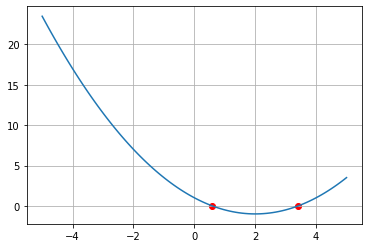

In [85]:
raiz=GetAllRoots(xn)
plt.plot(xn,pol(xn))
plt.scatter(raiz,pol(raiz),color='r')
plt.grid()

In [86]:
f1 = lambda x: np.exp(-x)*((x-raiz[1])/(raiz[0]-raiz[1]))
f2 = lambda x: np.exp(-x)*((x-raiz[0])/(raiz[1]-raiz[0]))


In [87]:
a=integrate.quad(f1,0,np.inf)
b=integrate.quad(f2,0,np.inf)

In [88]:
def f(x):
    return x**3

In [89]:
I=f(raiz[0])*a[0]
I+=f(raiz[1])*b[0]
I